In [47]:
#При необходимости установите библиотеки

#pip install scikit-learn

In [48]:
#импортируем необходимые библиотеки
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# EDA

In [49]:
#импорт данных из xslx в датафрэйм pandas
raw_data = pd.read_excel("for_clustering.xlsx")

In [50]:
#информация о представленных данных
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27508 entries, 0 to 27507
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id_client                 27508 non-null  int64  
 1   InWeek_amount             27508 non-null  float64
 2   InWeek_SKU                27508 non-null  int64  
 3   Checkinmonth_average      27508 non-null  int64  
 4   Checkamount_mean          27508 non-null  float64
 5   Count_transac             27508 non-null  int64  
 6   Total_amount              27508 non-null  float64
 7   Total_SKU_qnt             27508 non-null  int64  
 8   Count_departments         27508 non-null  int64  
 9   Count_shop                27508 non-null  int64  
 10  Count_city                27508 non-null  int64  
 11  Tenure                    27508 non-null  int64  
 12  SKU_meanbytransac         27508 non-null  int64  
 13  Amount_last6mnth          27508 non-null  float64
 14  Check_

In [51]:
#Выводим количество пустых значений по столбцам
raw_data.isnull().sum()

Id_client                     0
InWeek_amount                 0
InWeek_SKU                    0
Checkinmonth_average          0
Checkamount_mean              0
Count_transac                 0
Total_amount                  0
Total_SKU_qnt                 0
Count_departments             0
Count_shop                    0
Count_city                    0
Tenure                        0
SKU_meanbytransac             0
Amount_last6mnth              0
Check_qntlast6mnth            0
SKU_price_mean                0
Gender                      241
Age                         152
Age_group                   152
Interval_visit                0
Days_pastvisit                0
Cat_householdchem_qnt         0
Cat_householdchem_amount      0
Cat_householdchem_share       0
Cat_careproducts_qnt          0
Cat_careproducts_amount       0
Cat_careproducts_share        0
Cat_toiletries_qnt            0
Cat_toiletries_amount         0
Cat_toiletries_share          0
Cat_healthwellnes_qnt         0
Cat_heal

In [52]:
#Описание статистических данных
raw_data.describe()

,Id_client,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,...,Cat_babyprod_qnt,Cat_babyprod_amount,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth
count,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,...,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000
mean,210314.227534,314.792325,31.457212,2.565363,159.516226,82.467500,9595.761182,764.242293,26.742911,3.858550,...,30.901847,557.603120,0.058614,0.999964,0.547368,40.344009,8.395158,936.135833,0.998073,0.920823
std,121828.905739,144.491147,11.379580,1.205160,111.533576,63.241479,4715.290935,451.728512,4.038126,2.757808,...,24.865939,557.239232,0.048882,0.006029,0.497760,23.765321,7.217166,590.934045,0.043853,0.270020
min,5743.000000,34.474000,2.000000,2.000000,10.239800,4.000000,739.360000,33.000000,7.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,99.000000,0.000000,0.000000
25%,105405.500000,213.042000,23.000000,2.000000,85.728675,39.000000,5897.177500,433.000000,24.000000,2.000000,...,14.000000,168.867500,0.022734,1.000000,0.000000,22.000000,3.000000,446.880000,1.000000,1.000000
50%,211786.000000,289.220350,31.000000,2.000000,128.752500,66.000000,8820.700000,674.000000,27.000000,3.000000,...,25.000000,390.972500,0.047616,1.000000,1.000000,37.000000,6.000000,825.895000,1.000000,1.000000
75%,309746.250000,385.379300,41.000000,2.000000,199.252325,108.000000,12631.300000,1003.000000,30.000000,5.000000,...,41.000000,762.786250,0.081647,1.000000,1.000000,55.000000,11.000000,1329.787500,1.000000,1.000000
max,830188.000000,2180.013700,51.000000,20.000000,1326.115700,990.000000,22748.390000,5058.000000,38.000000,46.000000,...,493.000000,15474.645100,0.887302,1.000000,1.000000,180.000000,112.000000,2478.470000,1.000000,1.000000


In [53]:
#проверка дубликатов в датафрейме
raw_data.duplicated().sum()

0

In [54]:
#Категории столбца Gender
raw_data["Gender"].unique()

array(['F', 'M', nan], dtype=object)

In [55]:
#Категории возрастных групп
raw_data["Age_group"].unique()

array(['35-45', '25-35', '45-55', '65+', '55-65', '0-25', nan],
      dtype=object)

In [56]:
#Заполним пустые значения возраста по медианному возрасту
df = raw_data.copy()
df['Age'] = df['Age'].fillna(round(df['Age'].median(),0))

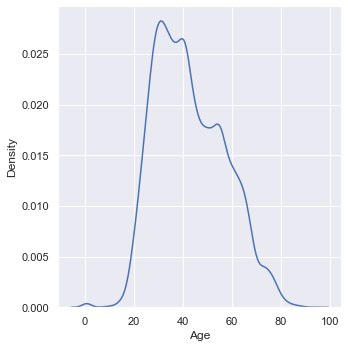

In [57]:
#График распределения клиентов по возрасту
sns.set(font_scale=1)
sns.displot(data=df, x="Age", kind = "kde")

In [58]:
#фрэйм возраст (ключ), возрастная группа
age_group_df = df[["Age", "Age_group"]]
age_group_df = age_group_df.drop_duplicates(subset = ["Age"])
age_group_df = age_group_df.drop_duplicates(subset = ["Age"])

In [59]:
#Распределение клиентов по возрастным группам
df["Age_group"].value_counts()

25-35    7132
35-45    6889
45-55    4948
55-65    4116
65+      2355
0-25     1916
Name: Age_group, dtype: int64

In [60]:
#Объединение фрэйомв 
df = pd.merge(df, age_group_df, how = "left", on = "Age")

In [61]:
#Проверка корректности
df["Age_group_y"].value_counts()

25-35    7132
35-45    7041
45-55    4948
55-65    4116
65+      2355
0-25     1916
Name: Age_group_y, dtype: int64

In [62]:
#Удаление прошлого столбца с возрастной группы
df.drop(columns = ["Age_group_x"], inplace = True)
df.rename(columns = {"Age_group_y":"Age_group"}, inplace = True)

In [63]:
#Замена значений в столбце Gender на булевые 1/0
df.loc[(df.Gender == "M"), 'Gender'] = 1
df.loc[(df.Gender == "F"), 'Gender'] = 0

# Feature selection
### из анализа уберем информацию о предпочтениях

In [64]:
#атрибуты фрейма
df.columns

Index(['Id_client', 'InWeek_amount', 'InWeek_SKU', 'Checkinmonth_average',
       'Checkamount_mean', 'Count_transac', 'Total_amount', 'Total_SKU_qnt',
       'Count_departments', 'Count_shop', 'Count_city', 'Tenure',
       'SKU_meanbytransac', 'Amount_last6mnth', 'Check_qntlast6mnth',
       'SKU_price_mean', 'Gender', 'Age', 'Interval_visit', 'Days_pastvisit',
       'Cat_householdchem_qnt', 'Cat_householdchem_amount',
       'Cat_householdchem_share', 'Cat_careproducts_qnt',
       'Cat_careproducts_amount', 'Cat_careproducts_share',
       'Cat_toiletries_qnt', 'Cat_toiletries_amount', 'Cat_toiletries_share',
       'Cat_healthwellnes_qnt', 'Cat_healthwellnes_amount',
       'Cat_healthwellnes_share', 'Cat_babyprod_qnt', 'Cat_babyprod_amount',
       'Cat_babyprod_share', 'Communication_3month', 'Response_communcation',
       'SKU_LastMonthqnt', 'Checks_LastMonthqnt', 'Amount_LastMonth',
       'Discount', 'Discount_LastMonth', 'Age_group'],
      dtype='object')

In [65]:
#подготовка для сегментации по частоте и сумме
columnsV1 = ["Gender", "InWeek_amount", "Checkinmonth_average", "Checkamount_mean", "Count_transac", "Total_amount", "Count_departments", "Count_shop", "Count_city", "Tenure", "Amount_last6mnth", "SKU_price_mean", "Interval_visit", "Days_pastvisit", "Communication_3month", "Response_communcation", "Amount_LastMonth", "Discount", "Discount_LastMonth"]
#columnsV2 = ["Cat_householdchem_amount", "Cat_careproducts_amount", "Cat_toiletries_amount", "Cat_healthwellnes_amount", "Cat_babyprod_amount", "Total_amount"]
df_V1 = df[columnsV1]

<AxesSubplot:>

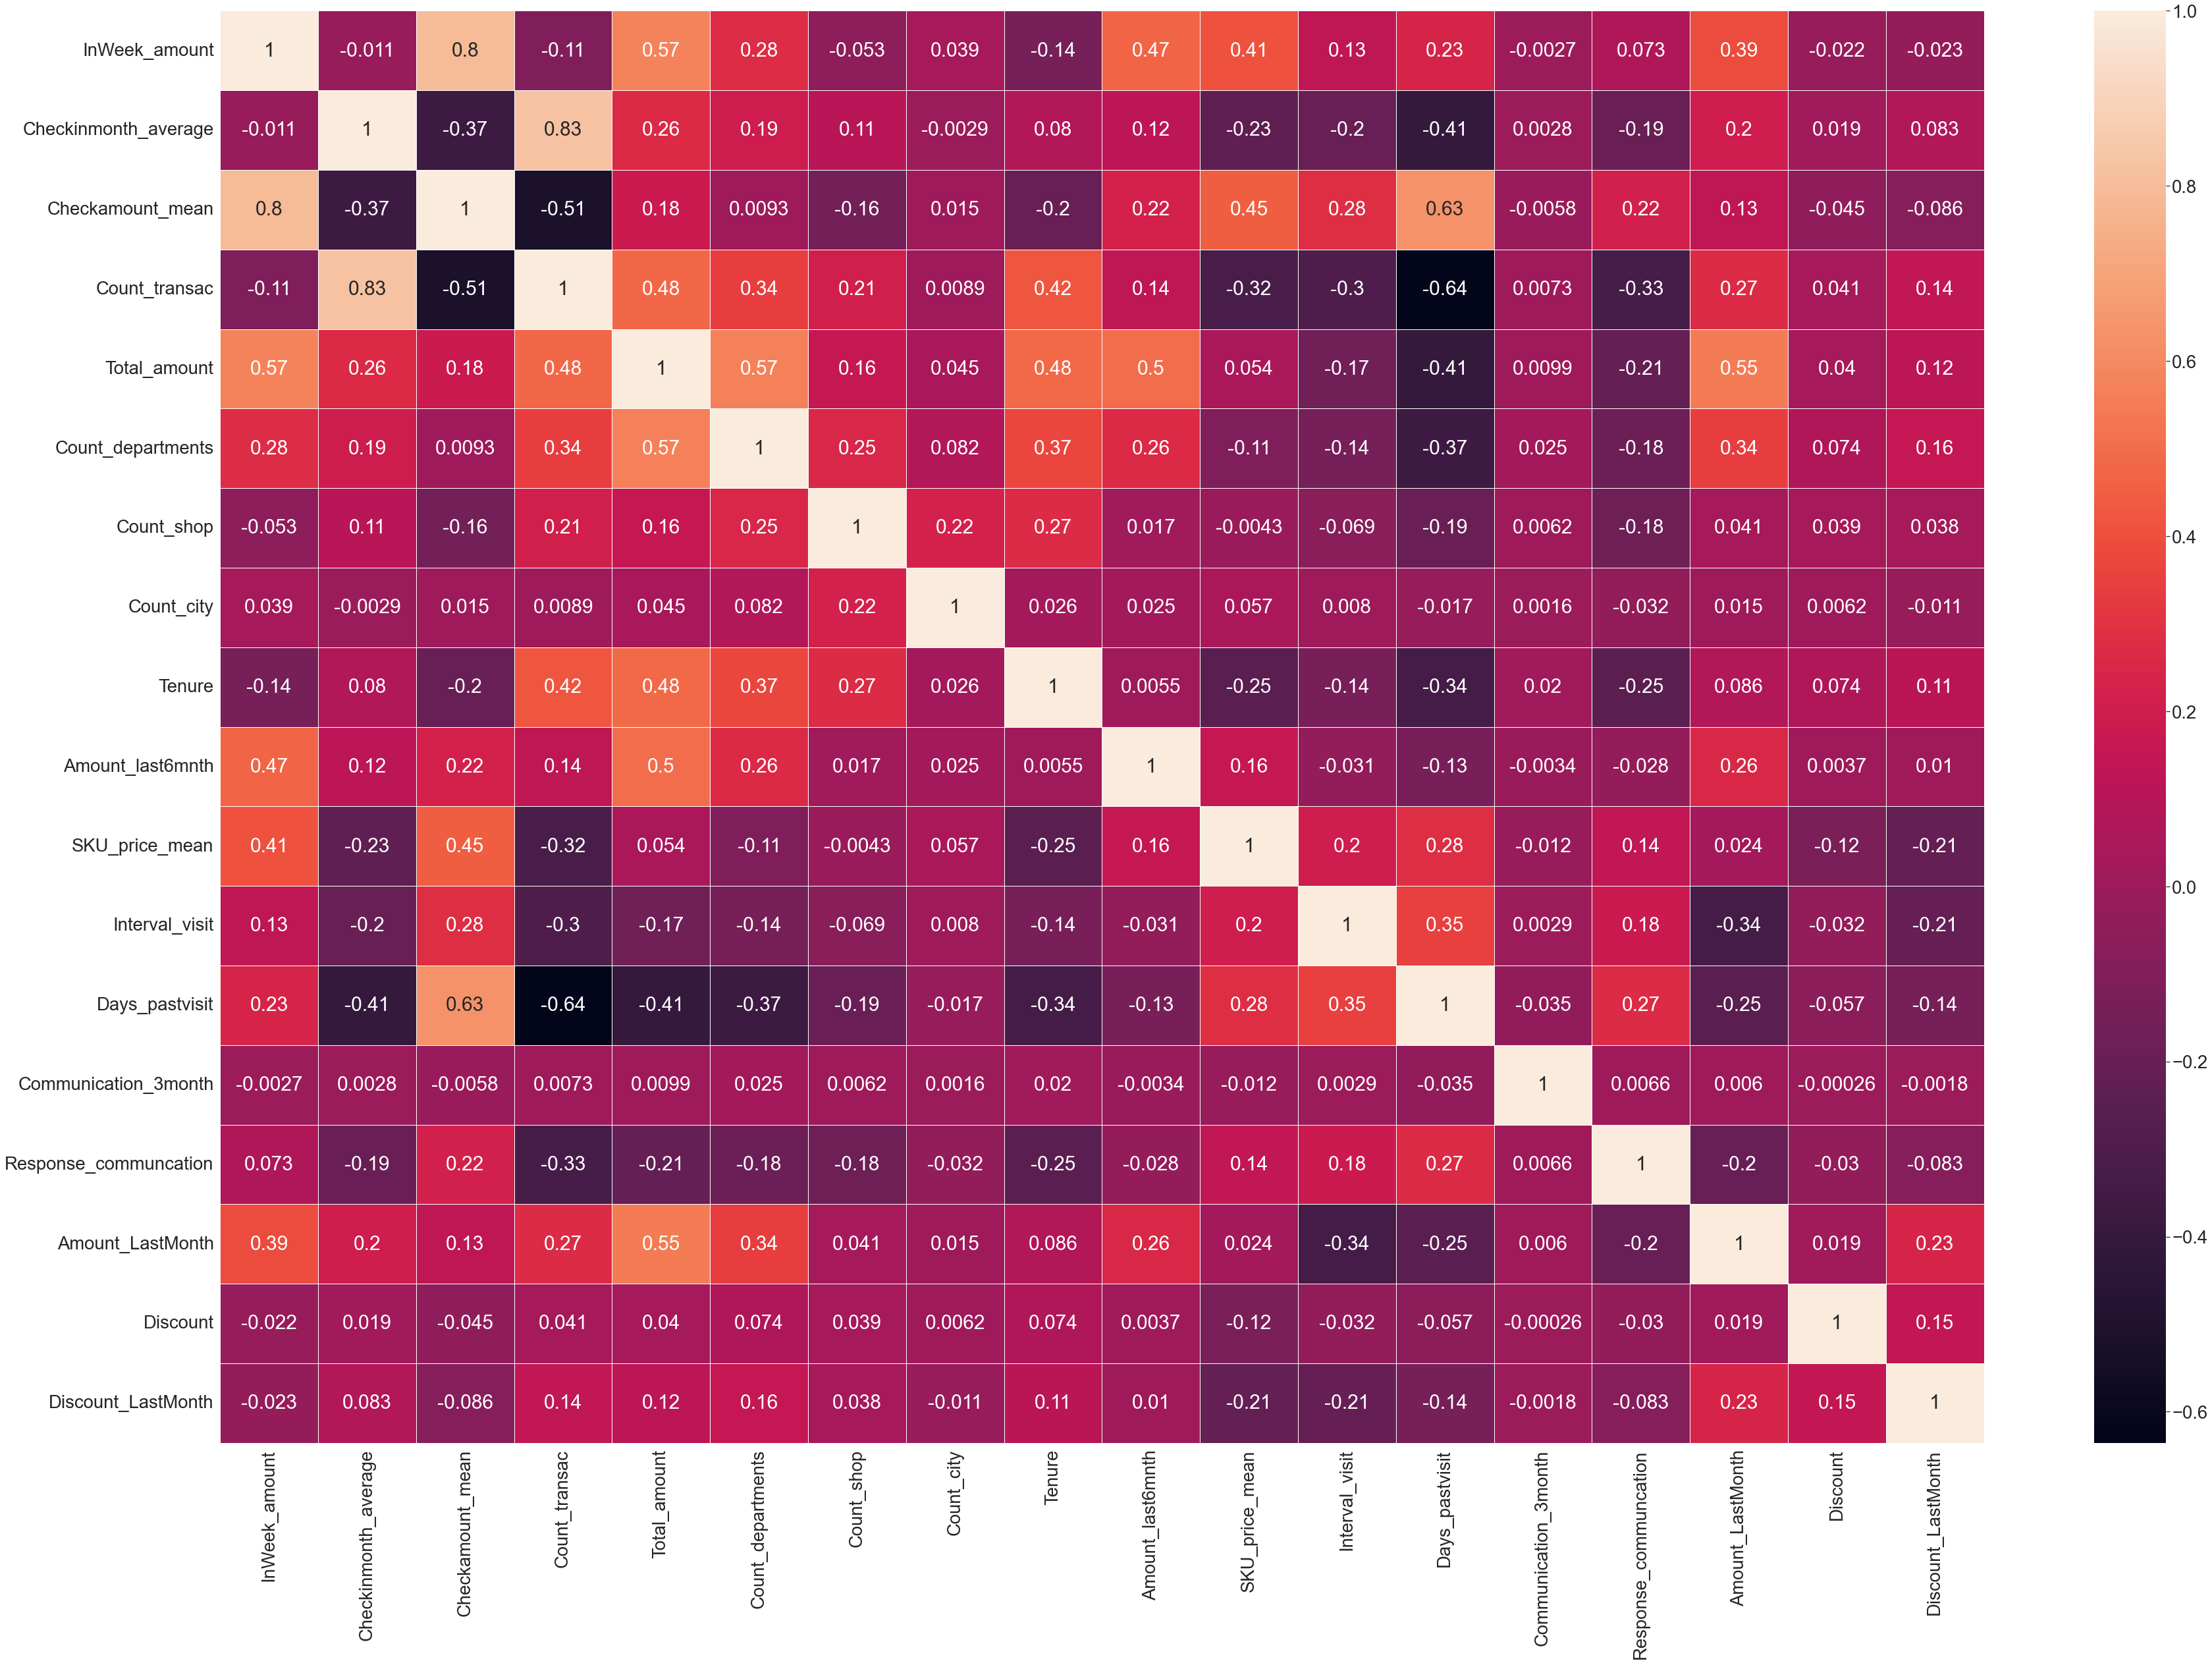

In [66]:
#heatmap корреляции признаков
sns.set(font_scale=2.5)
f, ax = plt.subplots(figsize=(60, 40))
sns.heatmap(df_V1.corr(), annot=True, linewidths=.5, ax=ax)

In [67]:
#выводим топ-5 столбцов по корреляции
corr = df_V1.corr().unstack().reset_index().rename(columns = {"level_0":"attribute_1","level_1":"attribute_2",0:"corr"})
#corr.drop_duplicates(subset = ["corr"], inplace = True)
corr["corr"] = abs(corr["corr"])
top5_corr = corr[corr["corr"]!=1].sort_values(by = "corr", ascending = False).head(6)

In [68]:
# 1. количество транзакций влияет на средний чек в месяц
# 2. Сумма в неделю зависит от мединного чека
# 3. Количество транзакций зависит от последнего дня визита
top5_corr

,attribute_1,attribute_2,corr
55,Count_transac,Checkinmonth_average,0.825261
21,Checkinmonth_average,Count_transac,0.825261
2,InWeek_amount,Checkamount_mean,0.795537
36,Checkamount_mean,InWeek_amount,0.795537
66,Count_transac,Days_pastvisit,0.635648
219,Days_pastvisit,Count_transac,0.635648


In [69]:
#добавляем столбцы в dataFrame
corr_col = top5_corr["attribute_1"].drop_duplicates().to_list()
df_V1_selected = df_V1[corr_col]

In [70]:
#Масштабирование данных
for_scaling = df_V1_selected.copy()
scaler = StandardScaler()
scaler.fit(for_scaling)
scaled_df = pd.DataFrame(scaler.transform(for_scaling),columns= for_scaling.columns )

### PCA

In [71]:
#Использование PCA для приведения к 2-мерному простратнству
pca = PCA(n_components=2)
PCA_df = pd.DataFrame(pca.fit_transform(scaled_df), columns=(["col1","col2"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,27508.0,3.609516e-16,1.696913,-10.583796,-0.900958,0.023743,0.900971,14.606513
col2,27508.0,1.655325e-16,1.172260,-2.159543,-0.854504,-0.193251,0.624782,11.561755


<AxesSubplot:xlabel='col1', ylabel='col2'>

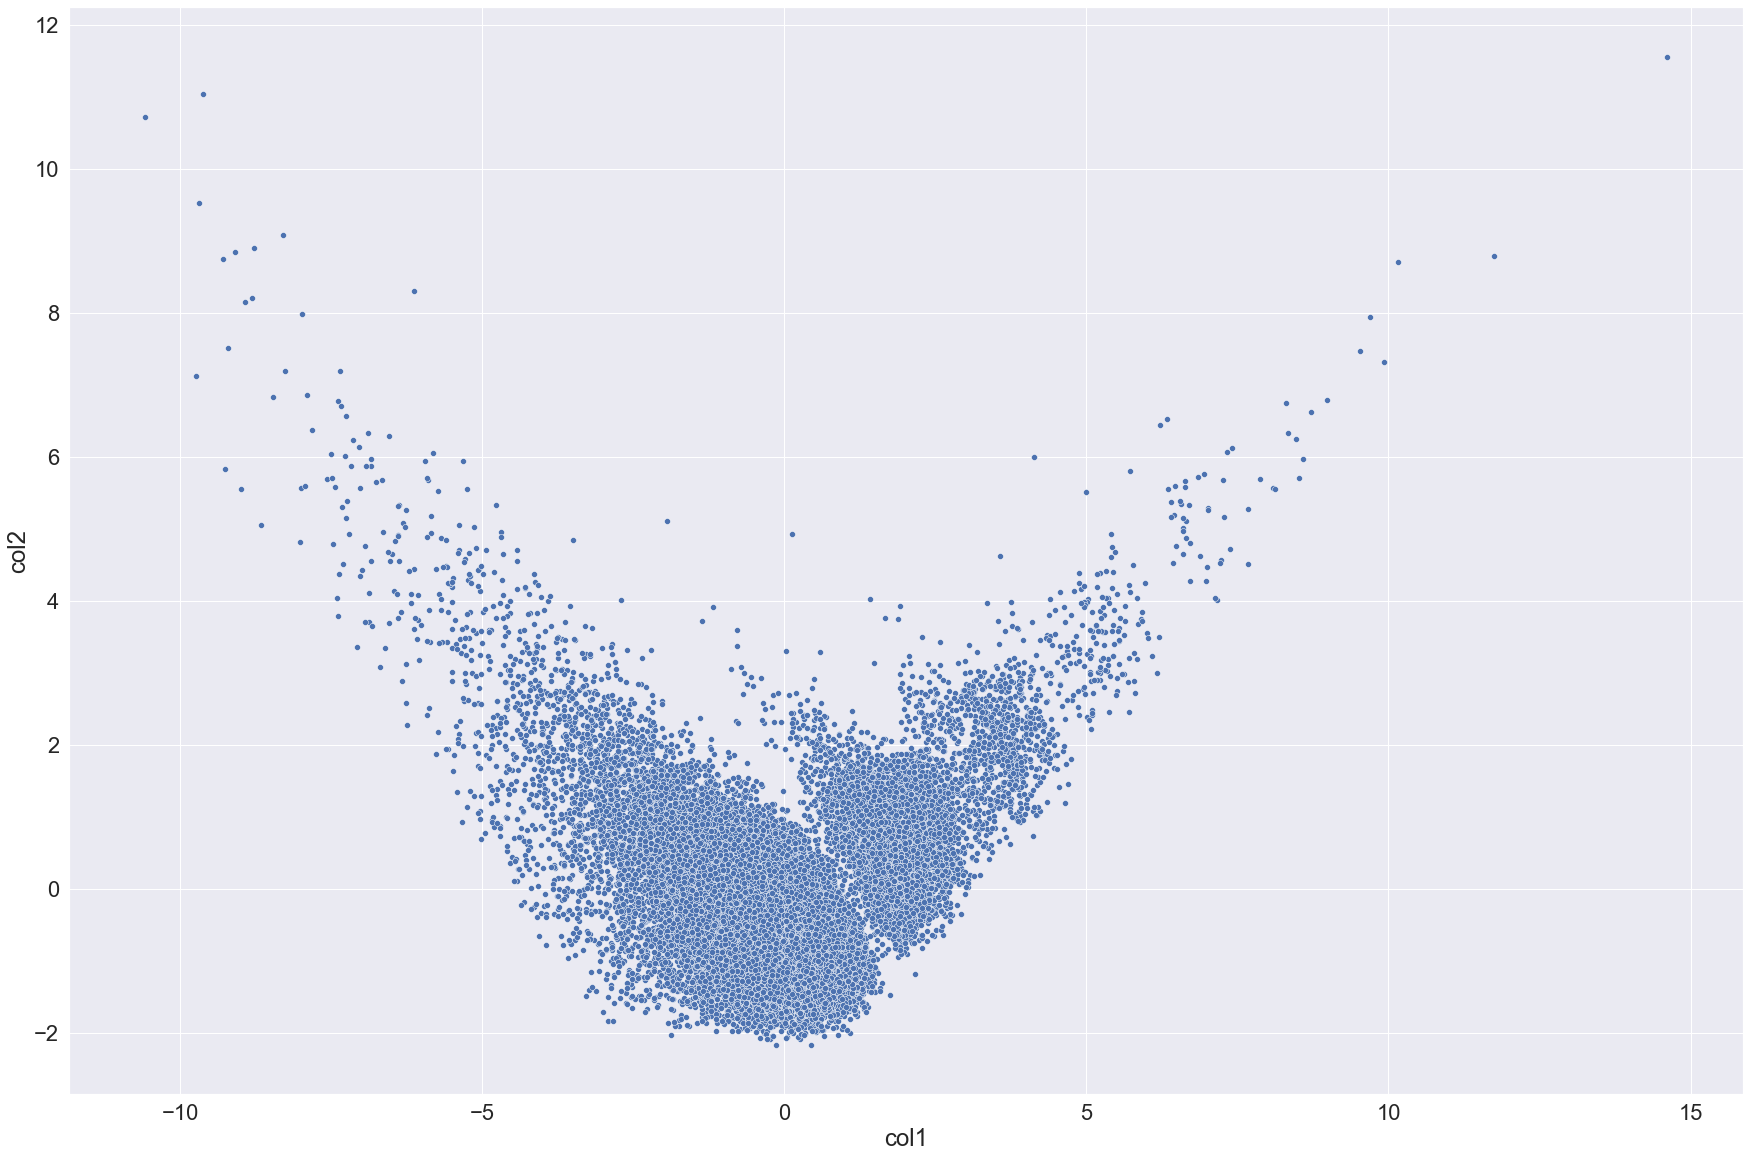

In [72]:
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(30, 20))
sns.scatterplot(data=PCA_df, x="col1", y="col2", ax = ax)

## TSNE

код закомментирован, так как TSNE в данном случае неэффективен, а обработка длится долго

In [73]:
#Использование TSNE для приведения к 2-мерному пространству
#tsne = TSNE(random_state=2)
#TSNE_df = pd.DataFrame(tsne.fit_transform(scaled_df), columns=(["col1","col2"]))
#TSNE_df.describe().T

In [74]:
#sns.set(font_scale=2)
#f, ax = plt.subplots(figsize=(30, 20))
#sns.scatterplot(data=TSNE_df, x="col1", y="col2", ax = ax)

На графиках наглядно видно, что PCA справился лучше чем TSNE, поэтому будем PCA алгоритм. 

# Сегментация клиентов по частоте и сумме покупок

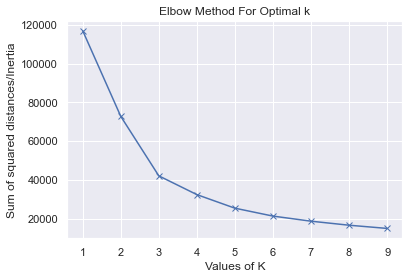

In [75]:
#выбор количества кластеров
sns.set(font_scale=1)
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(PCA_df)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [76]:
#Использование k-means метода 
kmeans = KMeans(n_clusters=3)
clust = kmeans.fit_predict(PCA_df)
PCA_df["Clusters"] = clust
raw_data["Clusters"] = clust

<AxesSubplot:xlabel='col1', ylabel='col2'>

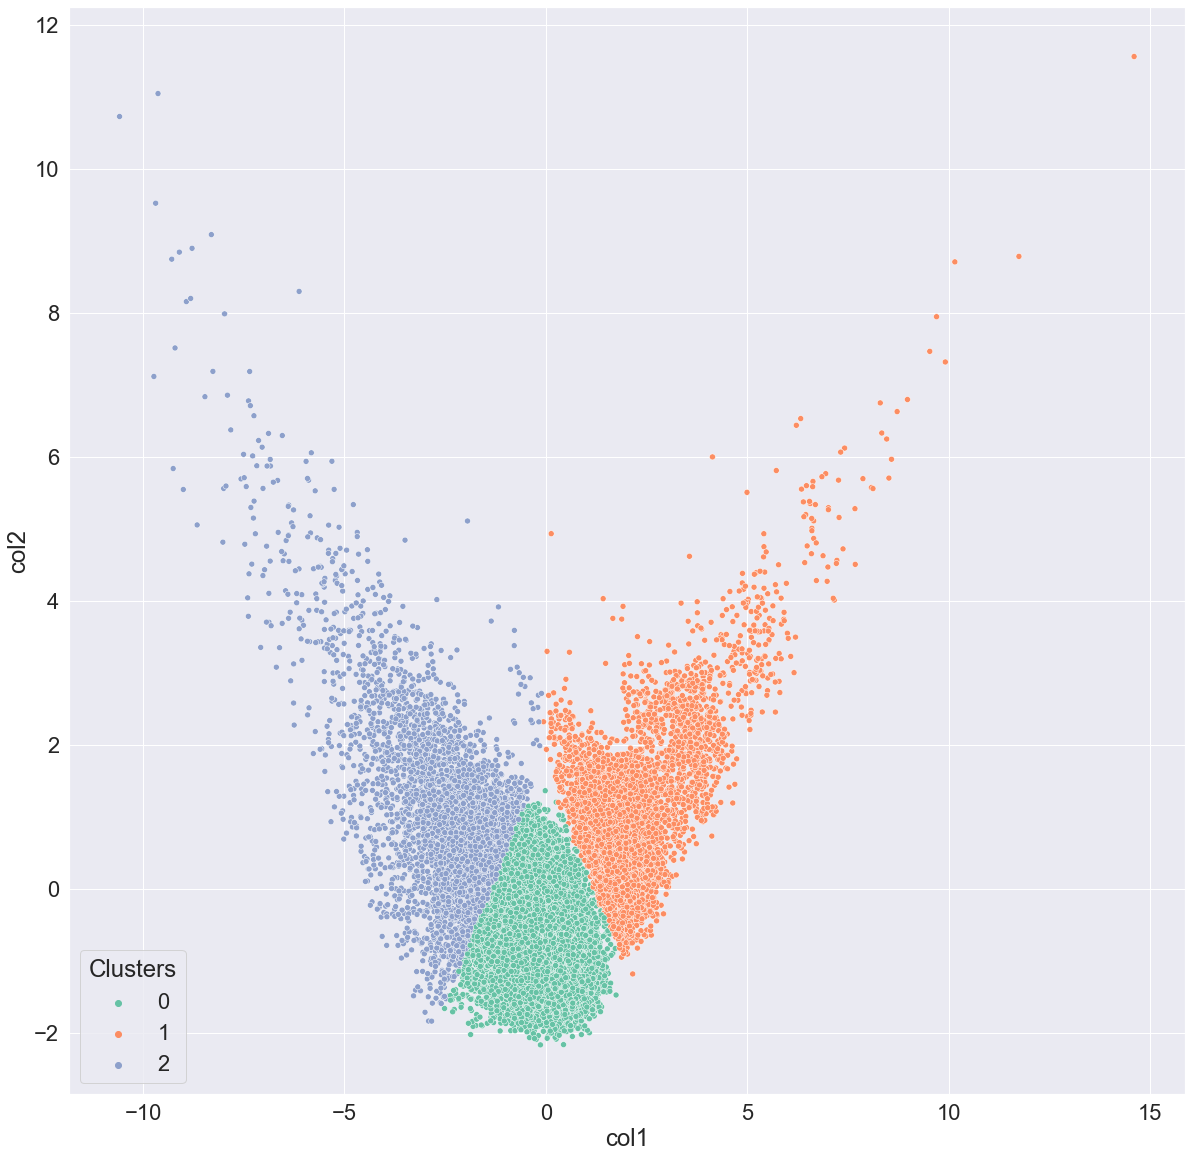

In [77]:
#Наложим кластеры на PCA график
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(20, 20))
sns.scatterplot(data=PCA_df, x="col1", y="col2", hue = "Clusters", ax = ax, palette = "Set2")

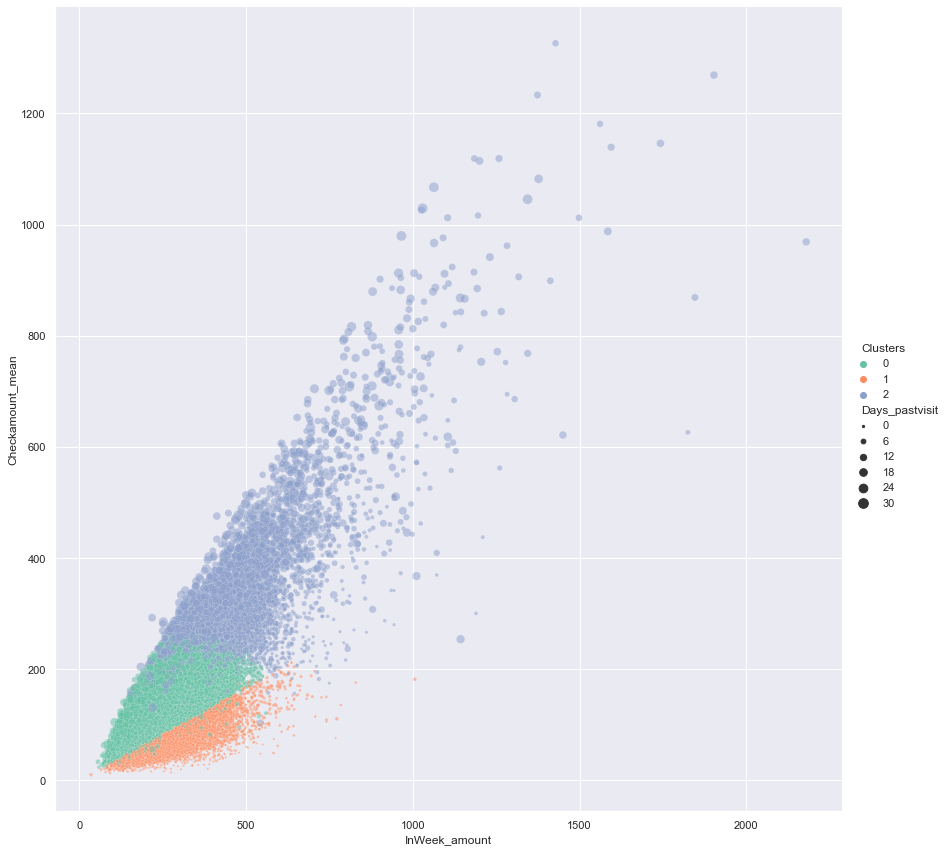

In [78]:
#график корреляции кластера, 
sns.set(font_scale=1)
sns.relplot(x="InWeek_amount", y="Checkamount_mean", hue="Clusters", size="Days_pastvisit",
            sizes=(5, 100), alpha=.5, palette="Set2",
            height=12, data=raw_data)

### График показывает зависимость, кластера клиента от его еженедельной суммы покупок, среднго чека и количества дней от его последнего визита.
### Средний чек влияет на сегментацию сильнее чем еженедельная сумма покупок
## Клиентов в данном датасете можно сегментировать по частоте и сумме покупок

In [79]:
#Распределение кластера
raw_data["Clusters"].value_counts()

0    16592
1     5996
2     4920
Name: Clusters, dtype: int64

# Сегментация клиентов по предпочтениям

In [80]:
#подготовка для сегментации по частоте предпочтениям
#оставляем столбцы только по доле категории, так как она корректнее всего показывает предпочтения клиента а столбцы по сумме и количеству линейно-зависимы 
columnsV2 = ["Cat_householdchem_share", "Cat_careproducts_share", "Cat_toiletries_share", "Cat_healthwellnes_share", "Cat_babyprod_share"]
df_V2 = df[columnsV2]

In [81]:
df_V2

,Cat_householdchem_share,Cat_careproducts_share,Cat_toiletries_share,Cat_healthwellnes_share,Cat_babyprod_share
0,0.221616,0.281507,0.330391,0.085479,0.081007
1,0.316181,0.310741,0.254921,0.081391,0.036766
2,0.040946,0.679295,0.053815,0.112970,0.112974
3,0.263096,0.258902,0.395256,0.055340,0.027406
4,0.257558,0.325343,0.106738,0.267573,0.042788
...,...,...,...,...,...
27503,0.227739,0.364555,0.294074,0.074565,0.039069
27504,0.392705,0.273499,0.201776,0.077629,0.054391
27505,0.160409,0.740571,0.043386,0.015072,0.040563
27506,0.255592,0.348558,0.275124,0.088588,0.032137


In [82]:
#здесь корреляцию признаков использовать не будем

In [83]:
#Масштабирование данных
for_scaling = df_V2.copy()
scaler = StandardScaler()
scaler.fit(for_scaling)
scaled_df_V2 = pd.DataFrame(scaler.transform(for_scaling),columns= for_scaling.columns )

In [84]:
#Использование PCA для приведения к 2-мерному простратнству
pca = PCA(n_components=2)
PCA_df = pd.DataFrame(pca.fit_transform(scaled_df_V2), columns=(["col1","col2"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,27508.0,4.055777e-17,1.440086,-2.819982,-1.030895,-0.296415,0.702275,12.267579
col2,27508.0,-9.500443e-17,1.252751,-5.488615,-0.832891,-0.048785,0.774317,5.794907


<AxesSubplot:xlabel='col1', ylabel='col2'>

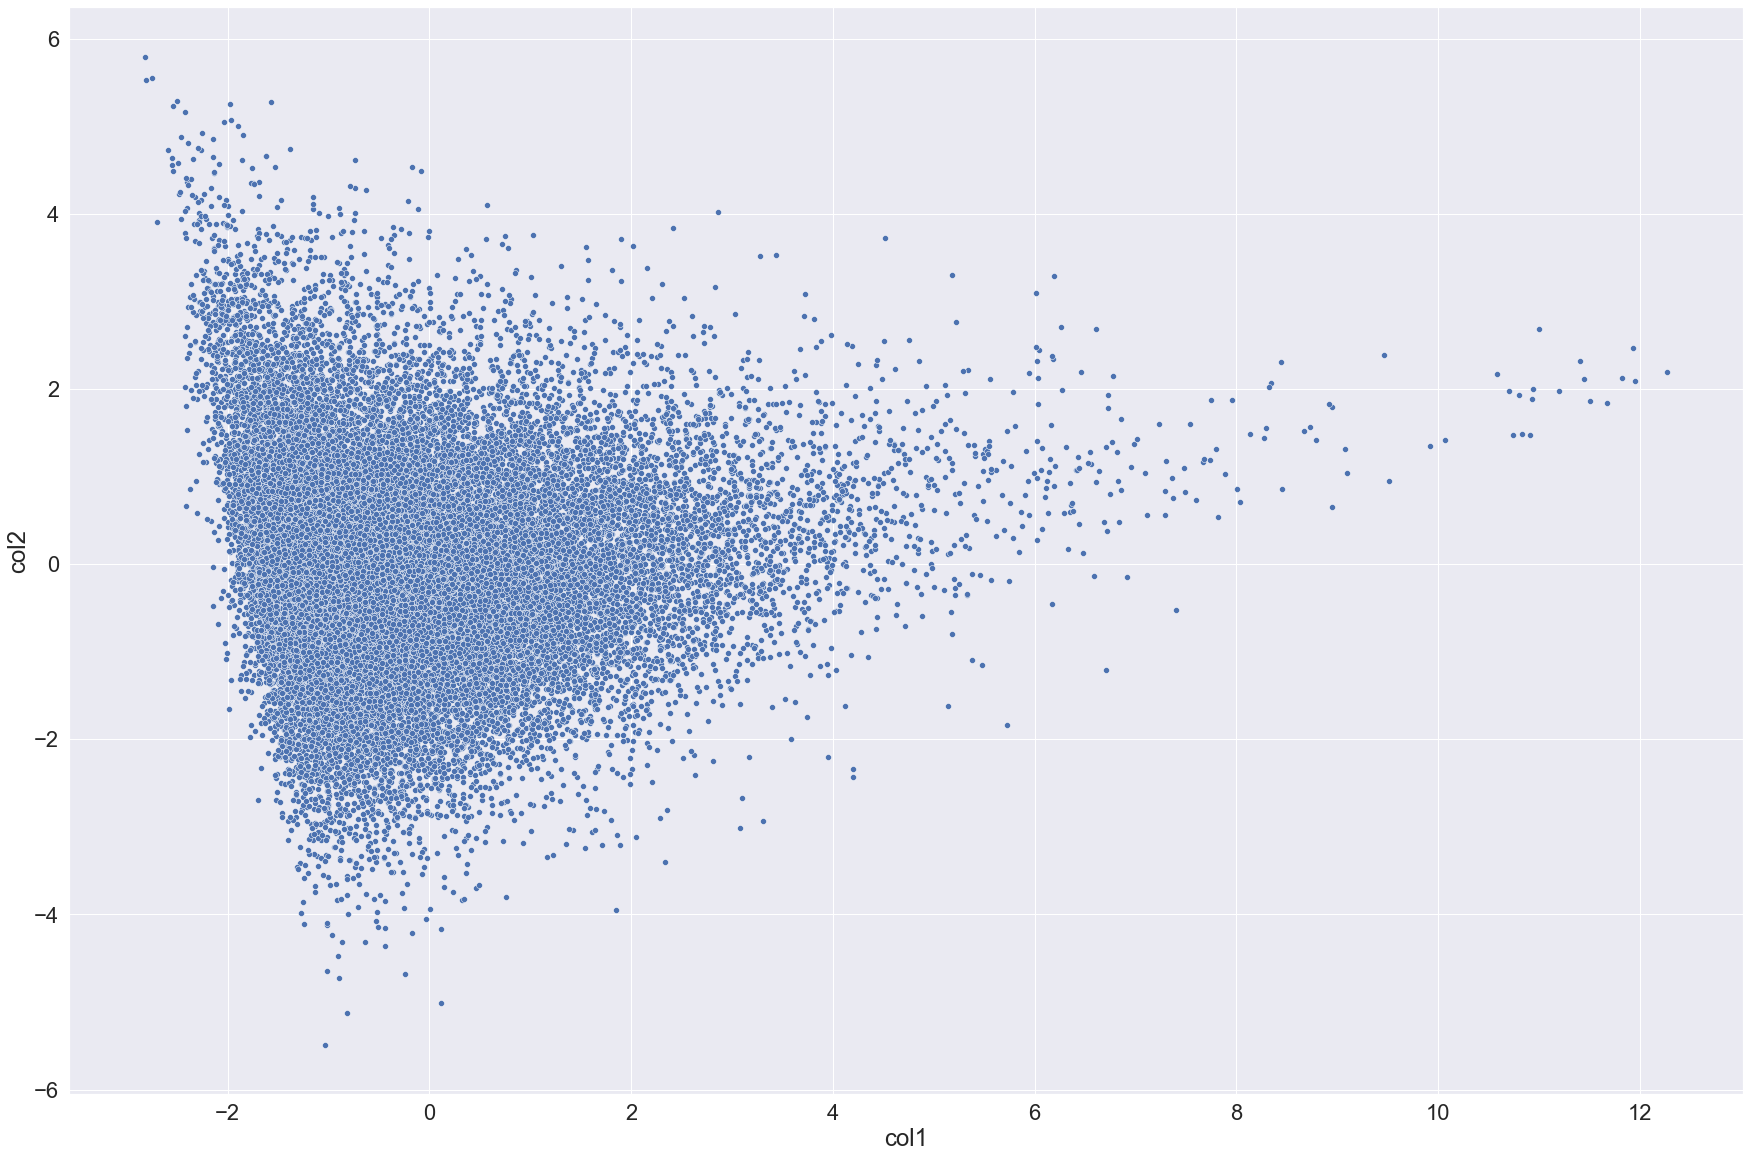

In [85]:
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(30, 20))
sns.scatterplot(data=PCA_df, x="col1", y="col2", ax = ax)

In [86]:
#Использование TSNE для приведения к 2-мерному пространству
#tsne = TSNE(random_state=5)
#TSNE_df = pd.DataFrame(tsne.fit_transform(scaled_df_V2), columns=(["col1","col2"]))
#TSNE_df.describe().T

In [87]:
#sns.set(font_scale=2)
#f, ax = plt.subplots(figsize=(30, 20))
#sns.scatterplot(data=TSNE_df, x="col1", y="col2", ax = ax)

### Сегментировать клиентов по предпочтениям, используя данный датасет невозможно.

In [88]:
cluster1 = raw_data[raw_data["Clusters"]==1]
cluster1.describe()

,Id_client,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,...,Cat_babyprod_amount,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,Clusters
count,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,...,5996.000000,5.996000e+03,5996.0,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.0
mean,198736.227318,306.278021,39.727151,4.538692,76.152989,170.326051,12145.406454,1115.365911,28.283522,4.448132,...,546.073613,4.392415e-02,1.0,0.343896,54.521181,16.896765,1173.271234,0.999833,0.968312,1.0
std,119933.599493,104.905610,8.984554,1.254319,30.491881,70.482765,4624.659083,486.207428,3.410869,3.308666,...,551.473829,3.865434e-02,0.0,0.475046,25.615298,9.263640,596.408161,0.012914,0.175182,0.0
min,5756.000000,34.474000,7.000000,4.000000,10.239800,47.000000,1034.220000,178.000000,10.000000,1.000000,...,0.010000,6.498558e-07,1.0,0.000000,2.000000,1.000000,99.180000,0.000000,0.000000,1.0
25%,90673.500000,227.411750,32.000000,4.000000,53.534300,123.000000,8555.100000,756.000000,26.000000,2.000000,...,166.268750,1.622003e-02,1.0,0.000000,36.000000,11.000000,699.277500,1.000000,1.000000,1.0
50%,199530.000000,298.287000,41.000000,4.000000,71.861900,157.000000,11748.075000,1047.500000,29.000000,4.000000,...,376.612500,3.428825e-02,1.0,0.000000,53.000000,16.000000,1130.285000,1.000000,1.000000,1.0
75%,298832.750000,374.857250,48.000000,4.000000,94.237925,198.000000,15428.355000,1390.000000,31.000000,6.000000,...,748.661250,6.192855e-02,1.0,1.000000,71.000000,21.250000,1607.132500,1.000000,1.000000,1.0
max,810022.000000,1006.131000,51.000000,20.000000,212.022700,990.000000,22748.390000,4878.000000,37.000000,46.000000,...,6203.065000,5.983736e-01,1.0,1.000000,180.000000,112.000000,2475.430000,1.000000,1.000000,1.0


In [89]:
cluster_total_sum = raw_data[["Clusters","Total_amount"]].groupby(by = ["Clusters"]).sum().reset_index()

<AxesSubplot:xlabel='Clusters', ylabel='Total_amount'>

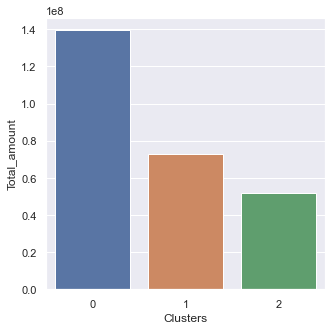

In [90]:
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(data=cluster_total_sum, x="Clusters", y="Total_amount",)

In [91]:
np.sum(raw_data[["Clusters","Total_amount"]].groupby(by = ["Clusters"]).sum())

Total_amount    2.639602e+08
dtype: float64

# Вывод:

## клиенты отличаются друг от друга частотой и суммой покупок. Также у них нет определенных предпочтений по товарам

### Наибольшее количество клиентов относится  к 1 кластеру (60%), и составляют 53% выручки. (коэфф. 0.88) Клиенты 1 кластера - наша текущая ЦА

### Доля клиентов кластера 0 - 17.7%, кластер 0 принес 20% выручки (коэфф. 1.13) - данный кластер выделяется высокой суммой среднего чека и еженедельных покупок. Однако данный кластер имеет большой промежуток дней после их последней операции

### Доля клиентов кластера 2 - 22.3%. Кластер 2 принес 28% выручки (коэфф 1.25). Данный кластер имеет наименьшую сумму среднего чека и еженедельных покупок. Однако данный кластер чаще всего возвращается. Данный кластер имеет наивысший коэффициент принесенной выручки относительно количества клиентов

# Необходимо усилить удержание клиентов из кластера 0 и мотивировать клиентов кластера 2 совершать больше покупок при каждом посещении